## 甘州图灵封神榜 2024-05-31 上榜数据分析

In [1]:
from IPython.display import Markdown, display
import pywencai
import pandas as pd
from datetime import datetime
import akshare as ak

import warnings

# 忽略所有警告信息
warnings.filterwarnings('ignore')

In [35]:
data_type ={
    '上榜时间': str, 
    '股票代码': str, 
    '股票名称': str, 
    '现价': float, 
    '涨跌幅': float, 
    '成交额': float
  }

df = pd.read_csv("2024-05-31.csv",dtype=data_type)
df['date'] = pd.to_datetime(df['上榜时间'])
df = df.set_index('date')
df
df_all=df

In [3]:
# 按'股票代码'分组并计算累计计数
df['cumcount'] = df.groupby('股票代码').cumcount()

# 筛选出每个股票代码第一次上榜的记录（cumcount为0）
df_first_occurrence = df[df['cumcount'] == 0]

# 删除辅助列'cumcount'
df_first_occurrence.drop(columns=['cumcount'], inplace=True)

# 显示结果
# print(df_first_occurrence)
print(df_first_occurrence.shape)

(18, 6)


In [4]:
# 获取沪深A股的今日OHLC数据
def get_today_ohlc(stock_code):
    symbol = f"sh{stock_code}" if stock_code[:1] == '6' else f"sz{stock_code}"
    start_date: str = "20240530"
    stock_zh_a_daily_df = ak.stock_zh_a_daily(symbol=symbol,start_date=start_date)
    if stock_zh_a_daily_df.empty:
        return pd.Series([None] * 4, index=['open', 'high', 'low', 'close'])
    else:
        return stock_zh_a_daily_df.iloc[-1]

# 使用apply函数简化循环，并确保返回的Series长度与DataFrame行数匹配
ohlc_columns = ['open', 'high', 'low', 'close']
df = df_first_occurrence
df = df.apply(lambda row: get_today_ohlc(row['股票代码']), axis=1)[ohlc_columns]
# print(df)
df_first_occurrence = pd.concat([df_first_occurrence, df], axis=1)
# 显示更新后的DataFrame
print(df_first_occurrence[['股票代码', '股票名称', '现价', '涨跌幅', 'open', 'high', 'low', 'close']])

                       股票代码  股票名称     现价    涨跌幅   open   high    low  close
date                                                                       
2023-05-31 09:35:02  002653   海思科  31.64   3.13  31.08  32.29  30.52  30.64
2023-05-31 09:38:44  300115  长盈精密  11.19   1.54  11.09  11.66  11.02  11.28
2023-05-31 09:38:44  603296  华勤技术  82.98   0.96  83.74  87.00  81.38  85.60
2023-05-31 09:38:44  301387  光大同创  43.96  15.71  42.60  45.59  39.94  45.59
2023-05-31 09:41:58  603633  徕木股份   8.77   0.23   8.68   9.00   8.65   8.85
2023-05-31 09:41:58  300290  荣科科技  12.17  12.69  10.71  12.96  10.71  12.93
2023-05-31 09:41:58  300433  蓝思科技  15.31   1.06  15.16  15.54  15.05  15.30
2023-05-31 09:41:58  603166  福达股份   6.91   7.30   6.56   7.08   6.05   6.17
2023-05-31 09:41:58  603009  北特科技  19.55   2.89  19.00  20.35  18.91  20.19
2023-05-31 09:41:58  300956  英力股份  26.80   1.13  25.20  29.96  25.00  29.00
2023-05-31 10:29:44  601077  渝农商行   5.18   3.19   5.03   5.18   5.03   5.16
2023-05-31 1

### 计算每笔交易的日收益率

In [5]:
df_first_occurrence['日收益率'] =round(100 * (df_first_occurrence['close'] - df_first_occurrence['现价']) /
                                    df_first_occurrence['现价'],2) 
df = df_first_occurrence[['股票代码', '股票名称', '现价', '涨跌幅',  'close','日收益率']]


def create_markdown_link(row):
    stock_code = row['股票代码']
    stock_name = row['股票名称']
    # 构建Markdown超链接字符串
    link = f"[{stock_name}](https://www.iwencai.com/unifiedwap/result?w={stock_code}&querytype=stock)"
    return link

# 使用apply函数为股票名称添加Markdown超链接
df['股票名称'] = df.apply(lambda row: create_markdown_link(row), axis=1)
display(Markdown(df.to_markdown()))


| date                |   股票代码 | 股票名称                                                                       |   现价 |   涨跌幅 |   close |   日收益率 |
|:--------------------|-----------:|:-------------------------------------------------------------------------------|-------:|---------:|--------:|-----------:|
| 2023-05-31 09:35:02 |     002653 | [海思科](https://www.iwencai.com/unifiedwap/result?w=002653&querytype=stock)   |  31.64 |     3.13 |   30.64 |      -3.16 |
| 2023-05-31 09:38:44 |     300115 | [长盈精密](https://www.iwencai.com/unifiedwap/result?w=300115&querytype=stock) |  11.19 |     1.54 |   11.28 |       0.8  |
| 2023-05-31 09:38:44 |     603296 | [华勤技术](https://www.iwencai.com/unifiedwap/result?w=603296&querytype=stock) |  82.98 |     0.96 |   85.6  |       3.16 |
| 2023-05-31 09:38:44 |     301387 | [光大同创](https://www.iwencai.com/unifiedwap/result?w=301387&querytype=stock) |  43.96 |    15.71 |   45.59 |       3.71 |
| 2023-05-31 09:41:58 |     603633 | [徕木股份](https://www.iwencai.com/unifiedwap/result?w=603633&querytype=stock) |   8.77 |     0.23 |    8.85 |       0.91 |
| 2023-05-31 09:41:58 |     300290 | [荣科科技](https://www.iwencai.com/unifiedwap/result?w=300290&querytype=stock) |  12.17 |    12.69 |   12.93 |       6.24 |
| 2023-05-31 09:41:58 |     300433 | [蓝思科技](https://www.iwencai.com/unifiedwap/result?w=300433&querytype=stock) |  15.31 |     1.06 |   15.3  |      -0.07 |
| 2023-05-31 09:41:58 |     603166 | [福达股份](https://www.iwencai.com/unifiedwap/result?w=603166&querytype=stock) |   6.91 |     7.3  |    6.17 |     -10.71 |
| 2023-05-31 09:41:58 |     603009 | [北特科技](https://www.iwencai.com/unifiedwap/result?w=603009&querytype=stock) |  19.55 |     2.89 |   20.19 |       3.27 |
| 2023-05-31 09:41:58 |     300956 | [英力股份](https://www.iwencai.com/unifiedwap/result?w=300956&querytype=stock) |  26.8  |     1.13 |   29    |       8.21 |
| 2023-05-31 10:29:44 |     601077 | [渝农商行](https://www.iwencai.com/unifiedwap/result?w=601077&querytype=stock) |   5.18 |     3.19 |    5.16 |      -0.39 |
| 2023-05-31 10:29:44 |     002807 | [江阴银行](https://www.iwencai.com/unifiedwap/result?w=002807&querytype=stock) |   4.14 |     0.98 |    4.14 |       0    |
| 2023-05-31 11:02:23 |     300762 | [上海瀚讯](https://www.iwencai.com/unifiedwap/result?w=300762&querytype=stock) |  18.18 |     7.19 |   18.44 |       1.43 |
| 2023-05-31 11:02:23 |     300395 | [菲利华](https://www.iwencai.com/unifiedwap/result?w=300395&querytype=stock)   |  32.79 |     4.59 |   32.15 |      -1.95 |
| 2023-05-31 11:07:54 |     300447 | [全信股份](https://www.iwencai.com/unifiedwap/result?w=300447&querytype=stock) |  15.03 |     4.01 |   14.94 |      -0.6  |
| 2023-05-31 11:07:54 |     301517 | [陕西华达](https://www.iwencai.com/unifiedwap/result?w=301517&querytype=stock) |  77.02 |     6.87 |   75.06 |      -2.54 |
| 2023-05-31 11:07:54 |     002977 | [天箭科技](https://www.iwencai.com/unifiedwap/result?w=002977&querytype=stock) |  35.07 |     9.83 |   34.85 |      -0.63 |
| 2023-05-31 11:07:54 |     600435 | [北方导航](https://www.iwencai.com/unifiedwap/result?w=600435&querytype=stock) |   9.73 |     2.53 |    9.66 |      -0.72 |

### 交易情况统计

In [6]:
# 筛选出盈利和亏损的股票
df_profit = df_first_occurrence[df_first_occurrence['close'] > df_first_occurrence['现价']]
df_loss = df_first_occurrence[df_first_occurrence['close'] < df_first_occurrence['现价']]

# 计算胜率和亏率
total_trades = len(df_first_occurrence)
profit_trades = len(df_profit)
loss_trades = len(df_loss)

win_rate = profit_trades / total_trades
loss_rate = loss_trades / total_trades

print("总交易次数: ", total_trades)
print("胜次数: ", profit_trades)
print("亏次数: ", )
print(f"胜率: {win_rate:.2f}")
print(f"亏率: {loss_rate:.2f}")


# 计算总成本和总收益
total_cost = df_first_occurrence['现价'].sum()
total_revenue = df_first_occurrence['close'].sum()

# 计算总体收益率
overall_return = ((total_revenue - total_cost) / total_cost) * 100

print(f"当日浮盈: {overall_return:.2f}%")

总交易次数:  18
胜次数:  8
亏次数: 
胜率: 0.44
亏率: 0.50
当日浮盈: 0.77%


In [7]:
# 按'股票代码'分组并计算累计计数
df_all['cumcount'] = df_all.groupby('股票代码').cumcount()
df_all

,上榜时间,股票代码,股票名称,现价,涨跌幅,成交额,cumcount
date,,,,,,,
2023-05-31 09:35:02,2023-05-31 09:35:02,002653,海思科,31.64,3.13,1947.63,0
2023-05-31 09:38:44,2023-05-31 09:38:44,300115,长盈精密,11.19,1.54,9342.60,0
2023-05-31 09:38:44,2023-05-31 09:38:44,603296,华勤技术,82.98,0.96,4155.67,0
2023-05-31 09:38:44,2023-05-31 09:38:44,301387,光大同创,43.96,15.71,24006.27,0
2023-05-31 09:41:58,2023-05-31 09:41:58,603633,徕木股份,8.77,0.23,3165.84,0
...,...,...,...,...,...,...,...
2023-05-31 14:58:13,2023-05-31 14:58:13,002977,天箭科技,34.93,9.40,53812.02,23
2023-05-31 14:58:13,2023-05-31 14:58:13,300762,上海瀚讯,18.41,8.55,173793.10,24
2023-05-31 14:58:13,2023-05-31 14:58:13,301517,陕西华达,75.02,4.09,116047.14,1


In [8]:
import matplotlib.pyplot as plt
plt.rcParams["font.serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# plt.rcParams['axes.formatter.use_locale'] - False
# print(matplotlib.matplotlib_fname())

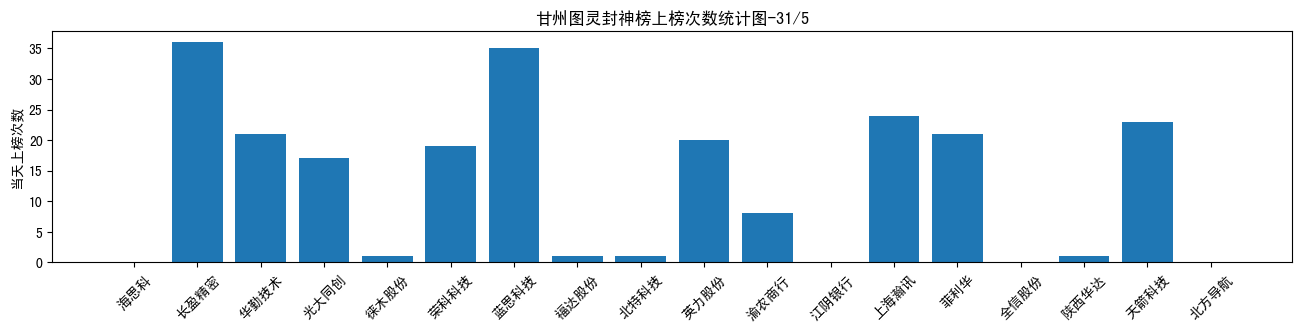

In [16]:



# 绘制柱状图
fig1 = plt.figure(figsize=(16, 3))
plt.bar(df_all['股票名称'], df_all['cumcount'])

# 添加标题和标签
plt.title('甘州图灵封神榜上榜次数统计图-31/5')
# plt.xlabel('Category')
plt.ylabel('当天上榜次数')
# 显示图例
plt.xticks(rotation=45) 
# ax2.legend()

# # 优化label显示,非必须
# plt.autofmt_xdate()
# fig2.autofmt_xdate()
# 显示图表
plt.show()

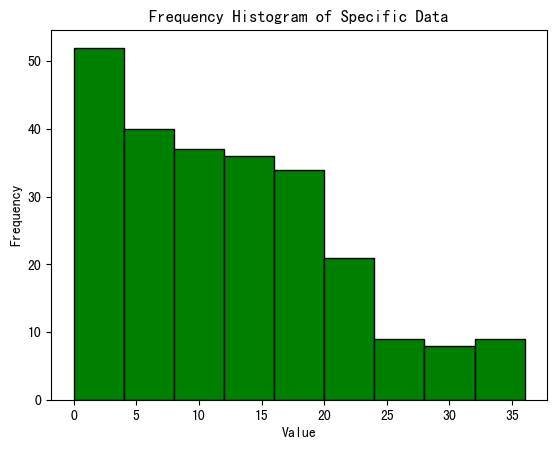

In [17]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]  # 具体的观测值列表
data = df_all['cumcount'].to_list()
plt.hist(data, bins='auto', color='green', edgecolor='black')
# 其他绘图设置保持不变
plt.title('Frequency Histogram of Specific Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Hour'>

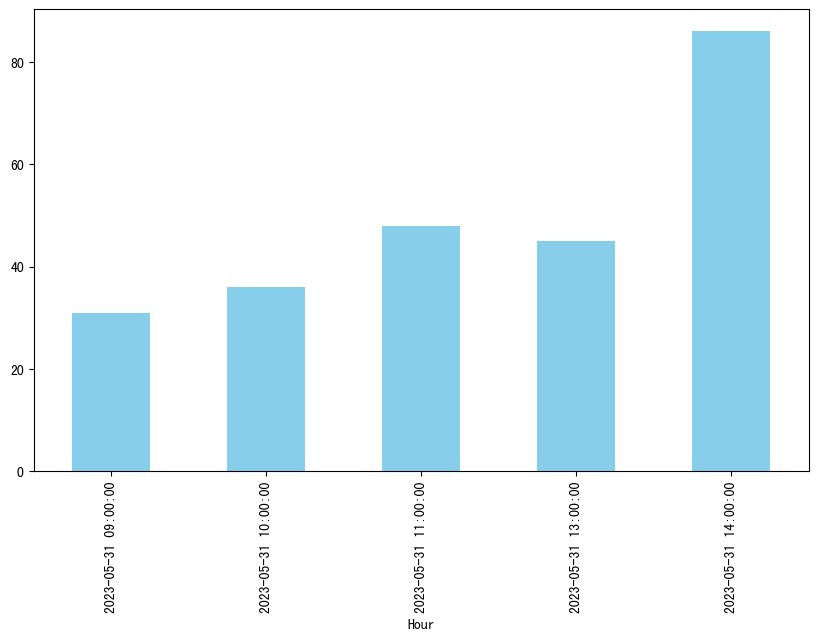

In [21]:
# 将时间分为时段，例如每小时
df_all['Hour'] = df_all.index.floor('H')  # 按小时分段
# print(df_all)

# 计算每个时段出现的次数
time_segment_counts = df_all.groupby('Hour').size()

# 绘制柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小
time_segment_counts.plot(kind='bar', color='skyblue')  # 绘制柱状图

<Axes: xlabel='Hour'>

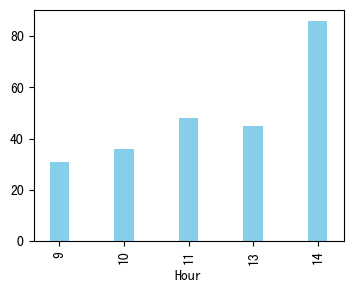

In [44]:
# 将时间分为时段，例如按小时
# df_all.index = df_all.index.normalize()  # 将时间戳转换为00:00:00的日期

# 创建一个时间段作为分组的依据，例如每小时
df_all['Hour'] = df_all.index.map(lambda x: x.hour)
# print(df_all )
# 将时间分为时段，例如每小时
# df_all['Hour'] = df_all.index.floor('H')  # 按小时分段
# print(df_all)

# 计算每个时段出现的次数
time_segment_counts = df_all.groupby('Hour').size()

# 绘制柱状图
plt.figure(figsize=(4, 3))  # 设置图形大小
time_segment_counts.plot(kind='bar', width=0.3, color='skyblue')  # 绘制柱状图

In [46]:
def get_stock_market(stock_code):
    if stock_code.startswith(('60', '68')):
        return "SH"
    elif stock_code.startswith(('0', '3')):
        return "SZ"
    elif stock_code.startswith(('4', '8')):
        return "BJ"
    else:
        return "Unknown"

In [63]:
stock_code ='300379' # df_all[:1]['股票代码'].to_list()[0]
venue = get_stock_market(stock_code)


In [64]:
symbol = f"{venue.lower()}{stock_code}"
print(symbol)
stock_zh_a_minute_df = ak.stock_zh_a_minute(
    symbol=symbol, period='5', adjust='hfq')
# stock_zh_a_minute_df[['open', 'high', 'low', 'close']] = stock_zh_a_minute_df[[
#     'open', 'high', 'low', 'close']].round(3)

sz300379
sz300379 股票数据不存在，请检查是否已退市
